# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is : data.csv.
- The codebook (explaining what the variables mean) is : codebook.csv.

In [1]:
# READ IN THE DATA SET HERE
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('data.csv')
codebook=pd.read_csv('codebook.csv')

# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later. 

Condition
Concept      0.690385
Retrieval    0.576471
Name: PR.2, dtype: float64

<AxesSubplot:xlabel='Condition'>

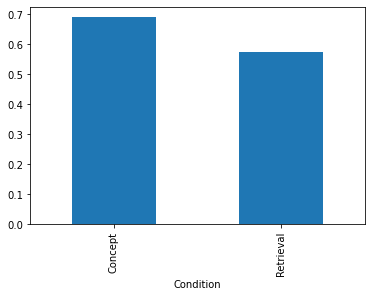

In [2]:
# YOUR CODE HERE
partPred = data.groupby('Condition')['PR.2'].mean()
display(partPred)
(partPred).plot.bar(stacked=True)

**So we can see here that the average predicition for those who used concept maps is higher than the predictions of those who used retieval.**

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

Condition
Concept      0.468846
Retrieval    0.616471
Name: TS.avg, dtype: float64

<AxesSubplot:xlabel='Condition'>

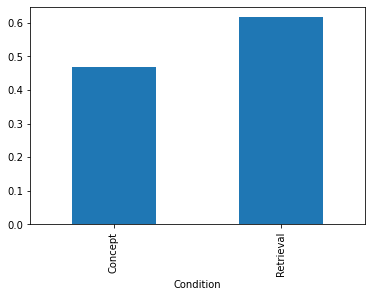

In [3]:
# YOUR CODE HERE
partTest = data.groupby('Condition')['TS.avg'].mean()
display(partTest)
(partTest).plot.bar(stacked=True)

**The retrieval group did better than the concept group**

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

In [4]:
# YOUR CODE HERE
data['predDeltaConcept'] = data.groupby('Condition').get_group('Concept')['PR.2'] - data.groupby('Condition').get_group('Concept')['TS.avg']
display(data['predDeltaConcept'])
display(data['predDeltaConcept'].abs().mean())
data['predDeltaRet'] = data.groupby('Condition').get_group('Retrieval')['PR.2'] - data.groupby('Condition').get_group('Retrieval')['TS.avg']
display(data['predDeltaRet'])
data['predDeltaRet'].abs().mean()

0     0.41
1     0.28
2     0.62
3     0.27
4     0.68
5     0.17
6     0.23
7     0.05
8    -0.01
9     0.22
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19    0.22
20    0.41
21    0.22
22    0.37
23    0.01
24    0.40
25    0.18
26    0.07
27    0.30
28   -0.40
29    0.38
30    0.20
31    0.06
32     NaN
33     NaN
34     NaN
35    0.50
36    0.21
37     NaN
38     NaN
39     NaN
40     NaN
41   -0.29
42     NaN
Name: predDeltaConcept, dtype: float64

0.2753846153846154

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10    0.06
11   -0.19
12    0.10
13    0.26
14   -0.04
15   -0.20
16    0.08
17   -0.33
18   -0.02
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32    0.43
33   -0.10
34    0.36
35     NaN
36     NaN
37   -0.23
38   -0.08
39   -0.44
40   -0.16
41     NaN
42   -0.18
Name: predDeltaRet, dtype: float64

0.19176470588235295

**The average amount that a person was off from their prediction if they were in the concept group was about .275. Compare this to if you were in the retrieval group your prediction was off .192 on average. Also you can see that many of the deltas are negative in the retireval group which means they predicted they would get a lower score but instead got a higher score. The reverse could be said for the concept group.**

# Question 4

This was a completely randomized experiment. This means that the condition that each subject was assigned to should be independent of their gender, age, and any other subject characteristics. Does that seem to be true in this case? Calculate a summary measure and/or make a visualization, and explain what you see.

<AxesSubplot:xlabel='Gender,Condition'>

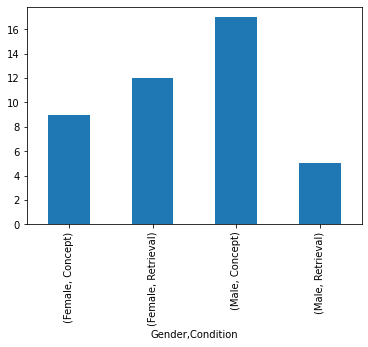

In [5]:
# YOUR CODE HERE
genderDist = data.groupby(['Gender','Condition'])['Condition'].count()
display(genderDist.plot.bar())

<AxesSubplot:xlabel='Age,Condition'>

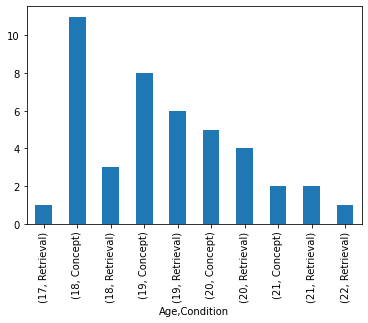

In [6]:
ageDist = data.groupby(['Age','Condition'])['Condition'].count()
ageDist.plot.bar()

**If you were a male you had a much higher chance of being in the concept group than if you were a female who were more evenly distibuted. If you were age 18 you had a much higher chance of being in the concept group than if you were any other age which were more evenly distributed.**

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn.